In [40]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
#from google.colab import drive
#drive.mount('/content/drive')

In [41]:
#import os 
#project = '100knock-AImodel'
#chapter = 10
#os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

#第１０章　AutoMLでモデル構築評価を行う10本ノック

## ノック91:PyCaretで回帰モデルの前処理を実施しよう

![](2022-10-02-06-55-42.png)

In [42]:
from pycaret.datasets import get_data
boston_data_all=get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
#90%を訓練データに振り分ける
boston_data=boston_data_all.sample(frac=0.90,random_state=0).reset_index(drop=True)
boston_data_unseen=boston_data_all.drop(boston_data.index).reset_index(drop=True)
print('All Data:'+str(boston_data_all.shape))
print('Data for Modeling:'+str(boston_data.shape))
print('Unseen Data for Predictions:'+str(boston_data_unseen.shape))

All Data:(506, 14)
Data for Modeling:(455, 14)
Unseen Data for Predictions:(51, 14)


In [44]:
from pycaret.regression import *
ret=setup(boston_data,
          target='medv',
          normalize=False,
          numeric_features=['chas'],
          session_id=0)

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(318, 21)"


## ノック92:PyCaretでtrain_sizeを変更してみよう

In [45]:
ret=setup(boston_data,
          target='medv',
          session_id=0,
          normalize=False,
          numeric_features=['chas'],
          categorical_features=['rad'],
          train_size=0.8,
          silent=True)

,Description,Value
0,session_id,0
1,Target,medv
2,Original Data,"(455, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(364, 21)"


## ノック93:PyCaretで回帰モデルを構築しよう

In [46]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [47]:
compare_models(sort='R2',fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1839,9.5456,3.0433,0.8761,0.1401,0.1107,0.1450
gbr,Gradient Boosting Regressor,2.1968,9.3363,3.0085,0.8746,0.1395,0.1109,0.0180
xgboost,Extreme Gradient Boosting,2.3903,11.8921,3.3662,0.8465,0.1533,0.1195,0.0360
lightgbm,Light Gradient Boosting Machine,2.3779,11.9894,3.4159,0.8436,0.1505,0.1185,0.0110
ada,AdaBoost Regressor,2.6713,12.6488,3.5252,0.8343,0.1708,0.1432,0.0160
rf,Random Forest Regressor,2.4777,13.1299,3.5434,0.8311,0.1585,0.1257,0.1550
lr,Linear Regression,3.4096,23.6075,4.7780,0.7074,0.2249,0.1714,0.0080
ridge,Ridge Regression,3.3909,23.8042,4.7885,0.7055,0.2287,0.1714,0.0040
br,Bayesian Ridge,3.4111,24.4277,4.8448,0.6996,0.2331,0.1726,0.0040
lar,Least Angle Regression,3.5443,24.7559,4.8873,0.6954,0.2298,0.1764,0.0040


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

## ノック94:PyCaretでハイパーパラメータをチューニングしよう

In [48]:
rf=create_model('rf',fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6951,17.7577,4.2140,0.8038,0.1707,0.1078
1,2.4529,11.0652,3.3264,0.9005,0.1622,0.1285
2,2.5246,11.3592,3.3703,0.8075,0.1525,0.1193
3,2.7081,22.7144,4.7660,0.6342,0.1783,0.1355
4,2.8522,21.2313,4.6077,0.7764,0.1977,0.1620
5,2.5445,11.2662,3.3565,0.9245,0.1736,0.1454
6,2.0312,6.8169,2.6109,0.8758,0.1411,0.1199
7,2.6908,14.6318,3.8252,0.8657,0.1668,0.1330
8,2.0722,5.9796,2.4453,0.9177,0.1153,0.0979


In [49]:
tuned_rf=tune_model(rf,optimize='r2',fold=10)
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0067,24.7128,4.9712,0.7270,0.1684,0.1143
1,2.6783,13.3939,3.6598,0.8796,0.1554,0.1315
2,2.1061,6.9402,2.6344,0.8824,0.1195,0.1020
3,2.3236,9.8265,3.1347,0.8417,0.1271,0.1076
4,3.4036,34.1707,5.8456,0.6401,0.2276,0.1853
5,2.9022,13.4361,3.6655,0.9100,0.1628,0.1463
6,2.0842,6.3144,2.5128,0.8850,0.1483,0.1268
7,3.1428,20.3447,4.5105,0.8132,0.1911,0.1512
8,2.2145,8.1430,2.8536,0.8879,0.1199,0.0996


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.05,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [50]:
tuned_rf=tune_model(rf,optimize='r2',fold=10,n_iter=50)
tuned_rf

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6705,17.5881,4.1938,0.8057,0.1576,0.1073
1,2.6953,13.2585,3.6412,0.8808,0.1559,0.1325
2,2.0749,6.7700,2.6019,0.8853,0.1212,0.1030
3,2.3891,10.1788,3.1904,0.8361,0.1330,0.1136
4,3.1798,27.4997,5.2440,0.7104,0.2158,0.1802
5,2.7368,11.4151,3.3786,0.9235,0.1550,0.1404
6,2.0337,5.9824,2.4459,0.8910,0.1445,0.1230
7,3.0874,19.6551,4.4334,0.8196,0.1879,0.1477
8,2.1652,7.3241,2.7063,0.8992,0.1150,0.0972


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## ノック95:PyCaretで回帰モデルを評価しよう

In [51]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

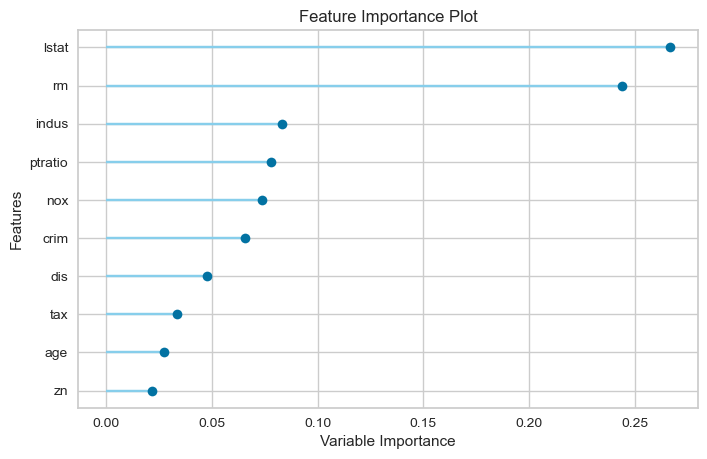

In [52]:
plot_model(tuned_rf,'feature')

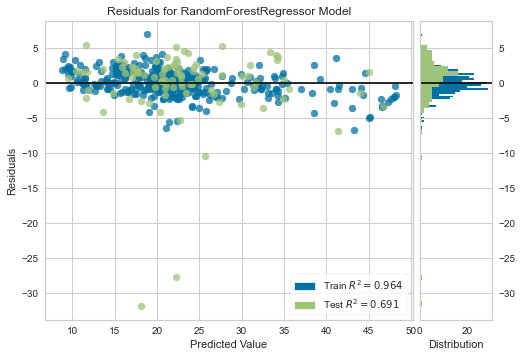

In [53]:
plot_model(tuned_rf,'residuals')

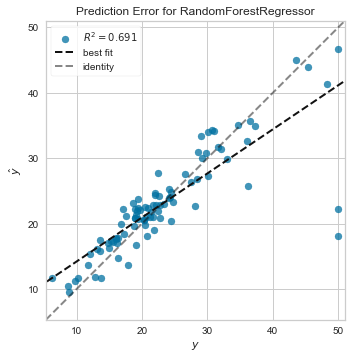

In [54]:
plot_model(tuned_rf,'error')

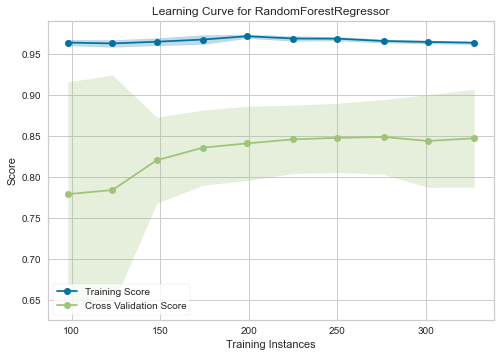

In [55]:
plot_model(tuned_rf,'learning')

## ノック96：PyCaretで回帰モデルを完成させて再利用しよう

In [56]:
#finalize_modelではcreare_modelでは使われなかったホールドアウトも使用
final_rf=finalize_model(tuned_rf)
final_rf

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=290, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [57]:
predict_model(final_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.4521,3.8375,1.9589,0.9561,0.0882,0.0719


,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,0.117470,12.5,7.87,0.0,0.524,6.009,82.900002,6.2267,311.0,15.200000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.900000,20.420621
1,0.072440,60.0,1.69,0.0,0.411,5.884,18.500000,10.7103,411.0,18.299999,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.600000,21.353809
2,0.614700,0.0,6.20,0.0,0.507,6.618,80.800003,3.2721,307.0,17.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.100000,27.714919
3,0.071650,0.0,25.65,0.0,0.581,6.004,84.099998,2.1974,188.0,19.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.299999,20.365038
4,0.130580,0.0,10.01,0.0,0.547,5.872,73.099998,2.4775,432.0,17.799999,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.400000,20.060681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,4.812130,0.0,18.10,0.0,0.713,6.701,90.000000,2.5975,666.0,20.200001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.400000,16.409644
87,0.013600,75.0,4.00,0.0,0.410,5.888,47.599998,7.3197,469.0,21.100000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.900000,19.679399
88,18.811001,0.0,18.10,0.0,0.597,4.628,100.000000,1.5539,666.0,20.200001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.900000,15.351710
89,1.232470,0.0,8.14,0.0,0.538,6.142,91.699997,3.9769,307.0,21.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.200000,16.423641


In [58]:
#未見データでの推論
predictions=predict_model(final_rf,data=boston_data_unseen)
print(predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6933,6.3746,2.5248,0.6631,0.1712,0.1229


        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0    4.75237  0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666     20.2   
1    4.66883  0.0  18.10     0  0.713  5.976  87.9  2.5806   24  666     20.2   
2    8.20058  0.0  18.10     0  0.713  5.936  80.3  2.7792   24  666     20.2   
3    7.75223  0.0  18.10     0  0.713  6.301  83.7  2.7831   24  666     20.2   
4    6.80117  0.0  18.10     0  0.713  6.081  84.4  2.7175   24  666     20.2   
5    4.81213  0.0  18.10     0  0.713  6.701  90.0  2.5975   24  666     20.2   
6    3.69311  0.0  18.10     0  0.713  6.376  88.4  2.5671   24  666     20.2   
7    6.65492  0.0  18.10     0  0.713  6.317  83.0  2.7344   24  666     20.2   
8    5.82115  0.0  18.10     0  0.713  6.513  89.9  2.8016   24  666     20.2   
9    7.83932  0.0  18.10     0  0.655  6.209  65.4  2.9634   24  666     20.2   
10   3.16360  0.0  18.10     0  0.655  5.759  48.2  3.0665   24  666     20.2   
11   3.77498  0.0  18.10    

In [59]:
save_model(final_rf,model_name='final_rf_model')
%ls

Transformation Pipeline and Model Successfully Saved
2022-10-02-06-55-42.png  logs.log                 第10章_answer.ipynb
final_rf_model.pkl       第10章.ipynb


In [60]:
load_tuned_rf_model=load_model(model_name='final_rf_model')
load_tuned_rf_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['rad'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['chas'],
                                      target='medv', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                 RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                                       criterion='mse', max_depth=7,
                                       max_features='sqrt', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impu

In [61]:
predictions=predict_model(load_tuned_rf_model,data=boston_data_unseen)
print(predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.6933,6.3746,2.5248,0.6631,0.1712,0.1229


        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0    4.75237  0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666     20.2   
1    4.66883  0.0  18.10     0  0.713  5.976  87.9  2.5806   24  666     20.2   
2    8.20058  0.0  18.10     0  0.713  5.936  80.3  2.7792   24  666     20.2   
3    7.75223  0.0  18.10     0  0.713  6.301  83.7  2.7831   24  666     20.2   
4    6.80117  0.0  18.10     0  0.713  6.081  84.4  2.7175   24  666     20.2   
5    4.81213  0.0  18.10     0  0.713  6.701  90.0  2.5975   24  666     20.2   
6    3.69311  0.0  18.10     0  0.713  6.376  88.4  2.5671   24  666     20.2   
7    6.65492  0.0  18.10     0  0.713  6.317  83.0  2.7344   24  666     20.2   
8    5.82115  0.0  18.10     0  0.713  6.513  89.9  2.8016   24  666     20.2   
9    7.83932  0.0  18.10     0  0.655  6.209  65.4  2.9634   24  666     20.2   
10   3.16360  0.0  18.10     0  0.655  5.759  48.2  3.0665   24  666     20.2   
11   3.77498  0.0  18.10    

## ノック97：PyCaretで回帰モデルを解釈しよう

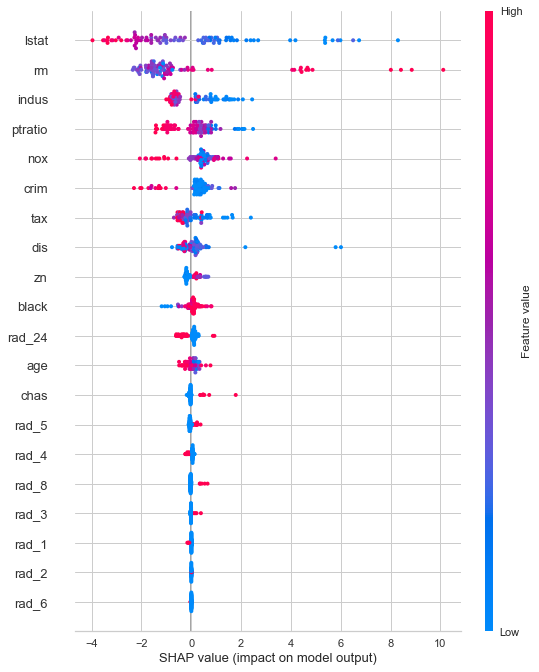

In [62]:
import shap
interpret_model(final_rf)

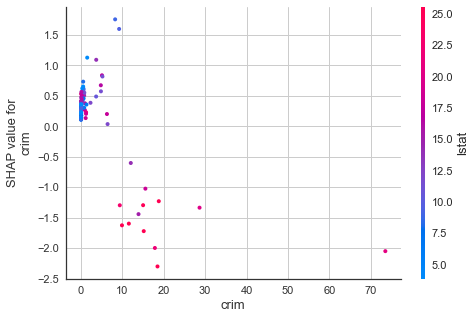

In [63]:
interpret_model(final_rf,plot='correlation')

In [64]:
interpret_model(final_rf,plot='reason',observation=1)

## ノック98：PyCaretで分類モデルを構築しよう


In [65]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
load_data=load_breast_cancer()
tg_df_all=pd.DataFrame(load_data.data, columns=load_data.feature_names)
tg_df_all['y']=load_data.target 
tg_df_all

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [66]:
tg_df = tg_df_all.sample(frac=0.90,random_state=0).reset_index(drop=True)
tg_df_unseen=tg_df_all.drop(tg_df.index).reset_index(drop=True)
print('All Data:'+str(tg_df.shape))
print('Data for Modeling:'+str(tg_df.shape))
print('Unseen Data for Predictions:'+str(tg_df_unseen.shape))

All Data:(512, 31)
Data for Modeling:(512, 31)
Unseen Data for Predictions:(57, 31)


In [67]:
from pycaret.classification import *
ret=setup(data=tg_df,
          target='y',
          session_id=0,
          normalize=False,
          train_size=0.6,
          silent=True
          )

,Description,Value
0,session_id,0
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(512, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [68]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [69]:
compare_models(sort='F1',fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.9946,0.9850,0.9669,0.9754,0.9265,0.9291,0.1580
ridge,Ridge Classifier,0.9575,0.0000,0.9900,0.9495,0.9686,0.9027,0.9079,0.0060
dt,Decision Tree Classifier,0.9575,0.9518,0.9700,0.9659,0.9675,0.9060,0.9076,0.0040
lightgbm,Light Gradient Boosting Machine,0.9542,0.9895,0.9800,0.9525,0.9656,0.8968,0.8997,0.0130
rf,Random Forest Classifier,0.9542,0.9918,0.9750,0.9571,0.9655,0.8972,0.8997,0.1720
qda,Quadratic Discriminant Analysis,0.9545,0.9922,0.9650,0.9657,0.9649,0.9001,0.9020,0.0090
lda,Linear Discriminant Analysis,0.9512,0.9893,0.9800,0.9487,0.9635,0.8897,0.8932,0.0040
xgboost,Extreme Gradient Boosting,0.9476,0.9870,0.9700,0.9521,0.9606,0.8823,0.8842,0.0220
ada,Ada Boost Classifier,0.9478,0.9900,0.9600,0.9611,0.9600,0.8848,0.8872,0.0240
gbc,Gradient Boosting Classifier,0.9411,0.9915,0.9550,0.9572,0.9553,0.8680,0.8714,0.0450


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [70]:
ridge = create_model('ridge',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
2,0.9355,0.0000,0.9500,0.9500,0.9500,0.8591,0.8591
3,0.9677,0.0000,1.0000,0.9524,0.9756,0.9281,0.9305
4,0.9677,0.0000,0.9500,1.0000,0.9744,0.9310,0.9332
5,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,1.0000,0.8696,0.9302,0.7568,0.7802
8,0.9667,0.0000,1.0000,0.9524,0.9756,0.9231,0.9258


In [71]:
from pickletools import optimize


tuned_ridge=tune_model(ridge,optimize='F1',fold=10,n_iter=100)
tuned_ridge


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9355,0.0000,1.0000,0.9091,0.9524,0.8531,0.8624
2,0.9355,0.0000,0.9500,0.9500,0.9500,0.8591,0.8591
3,0.9677,0.0000,1.0000,0.9524,0.9756,0.9281,0.9305
4,0.9677,0.0000,0.9500,1.0000,0.9744,0.9310,0.9332
5,0.9677,0.0000,1.0000,0.9524,0.9756,0.9281,0.9305
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0000,1.0000,0.8696,0.9302,0.7568,0.7802
8,0.9667,0.0000,1.0000,0.9524,0.9756,0.9231,0.9258


RidgeClassifier(alpha=0.65, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=0, solver='auto',
                tol=0.001)

## ノック99：PyCaretで分類モデルを評価しよう

In [72]:
evaluate_model(tuned_ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

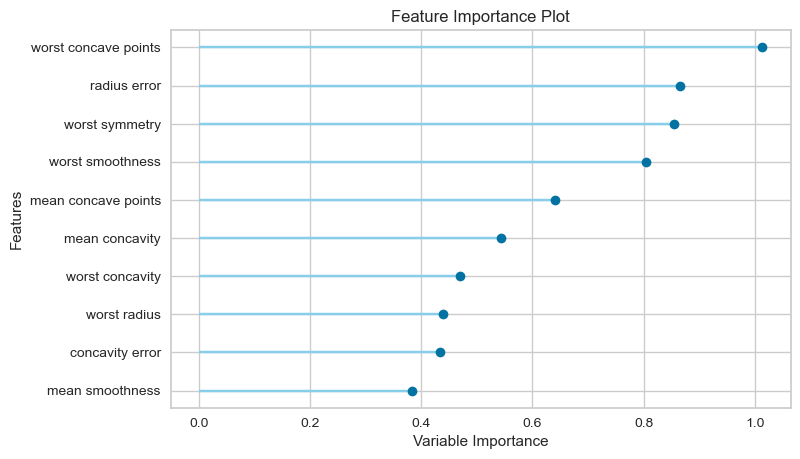

In [73]:
plot_model(tuned_ridge,'feature')

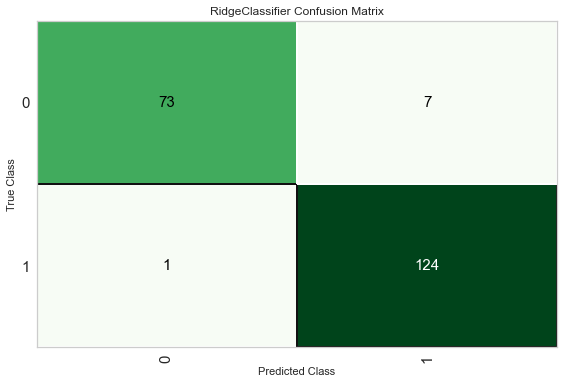

In [74]:
plot_model(tuned_ridge,plot='confusion_matrix')

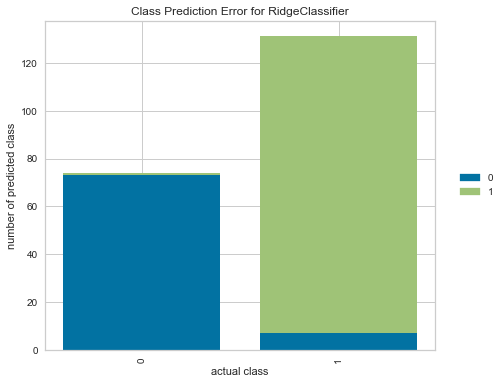

In [75]:
plot_model(tuned_ridge,'error')

In [76]:
final_ridge=finalize_model(tuned_ridge)
predict_model(final_ridge)
predictions=predict_model(final_ridge,data=tg_df_unseen)
print(predictions)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.32981e-09): result may not be accurate.
  overwrite_a=True).T
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.06146e-09): result may not be accurate.
  overwrite_a=True).T
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.35932e-09): result may not be accurate.
  overwrite_a=True).T
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.86243e-09): result may not be accurate.
  overwrite_a=True).T
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9561,0.9438,1.0000,0.9328,0.9653,0.9058,0.9099


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9649,0.9286,1.0000,0.9556,0.9773,0.9005,0.9050


    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.400         20.52           88.64      556.7          0.11060   
1        14.580         13.66           94.29      658.8          0.09832   
2        15.050         19.07           97.26      701.9          0.09215   
3        11.340         18.61           72.76      391.2          0.10490   
4        18.310         20.58          120.80     1052.0          0.10680   
5        19.890         20.26          130.50     1214.0          0.10370   
6        12.880         18.22           84.45      493.1          0.12180   
7        12.750         16.70           82.51      493.8          0.11250   
8         9.295         13.90           59.96      257.8          0.13710   
9        24.630         21.60          165.50     1841.0          0.10300   
10       11.260         19.83           71.30      388.1          0.08511   
11       13.710         18.68           88.73      571.0          0.09916   

## ノック100：PyCaretでクラスタリングを実施してPCAで可視化しよう

In [77]:
import pandas as pd 
from sklearn.datasets import load_iris
iris=load_iris()
df_iris=pd.DataFrame(iris.data,columns=iris.feature_names)

In [78]:
from pycaret.clustering import *
data_clust=setup(data=df_iris,
                 normalize=False,
                 session_id=0,
                 silent=True
                 )
#silent=Trueで型推定の確認をしない

,Description,Value
0,session_id,0
1,Original Data,"(150, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(150, 4)"
9,CPU Jobs,-1


In [79]:
kmeans=create_model('kmeans',num_clusters=3)
print(kmeans)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5528,561.6277,0.662,0,0,0


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=0, tol=0.0001, verbose=0)


In [80]:
plot_model(kmeans)

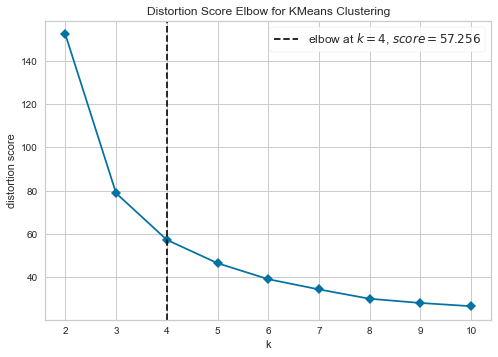

In [81]:
plot_model(kmeans,plot='elbow')

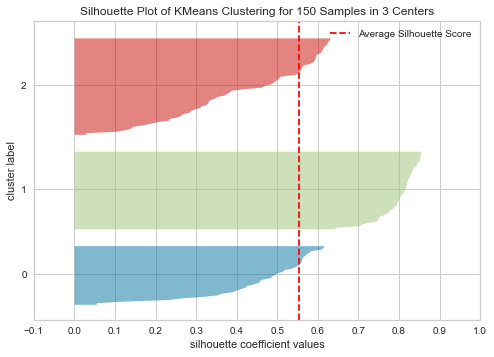

In [82]:
plot_model(kmeans,plot='silhouette')

In [83]:
ret=predict_model(kmeans,data=df_iris)
ret

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,Cluster 1
1,4.9,3.0,1.4,0.2,Cluster 1
2,4.7,3.2,1.3,0.2,Cluster 1
3,4.6,3.1,1.5,0.2,Cluster 1
4,5.0,3.6,1.4,0.2,Cluster 1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Cluster 0
146,6.3,2.5,5.0,1.9,Cluster 2
147,6.5,3.0,5.2,2.0,Cluster 0
148,6.2,3.4,5.4,2.3,Cluster 0
